# Protocol d'encriptació RSA

### Definim dues rutines d'encriptació/desencriptació

In [49]:
def encrypt(message, e, n):
    crypt = pow(message, e, n)
    return crypt

In [50]:
def decrypt(crypt, d, n):
    message = pow(crypt, d, n)
    return message

### Per enviar un missatge encriptat triem 2 nombres e i N (clau pública)

In [110]:
message = 3
p = 2
q = 7
N = p*q
e = 5
d = 5

In [111]:
c = encrypt(message, e, N)
c

5

### Per desecncriptar necessitem un altre nombre d (clau privada)
### (només el receptor pot desencriptar el missatge original)

In [112]:
m = decrypt(c, d, N)
m

3

In [113]:
message = 4
p = 907
q = 773
N = p*q
e = 11
d = 254339

In [114]:
c = encrypt(message, e, N)
c

688749

In [115]:
m = decrypt(c, d, N)
m

4

### Com triem els nombre e, N i d ?

In [116]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

In [117]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def coprime(a, b):
    return gcd(a, b) == 1

### Triem un nombre e coprimer amb N i (p-1) i (q-1)

In [118]:
e = 5
p = 2
q = 7
N = p*q
print(coprime(e, N))
print(coprime(e, p-1))
print(coprime(e, q-1))

True
True
True


### d és l'invers mod(p-1)*(q-1) de e (aquesta operació és sencilla de calcular si coneixem els factors p i q, però molt complicada si només coneixem n)

In [119]:
d = modinv(e, (p-1)*(q-1))
d

5

# Verifiquem com complicat és factoritzar un nombre

In [78]:
def is_prime(n):
    if n == 1:
        return False
    if n % 2 == 0:
        return False
    i = 3
    while i * i <= n:
        if n % i == 0:
            return False
        i += 2
    return True


def prime_factors(n):
    prime_factor_list = []
    while not n % 2:
        prime_factor_list.append(2)
        n //= 2
    while not n % 3:
        prime_factor_list.append(3)
        n //= 3
    i = 5
    while n != 1:
        if is_prime(i):
            while not n % i:
                prime_factor_list.append(i)
                n //= i
        i += 2

    return prime_factor_list

In [77]:
prime_factors(129)

[3, 43]

In [79]:
import time

In [87]:
running_times = []
for i in range(2,50000,2):
    start = time.time()
    prime_factors(i)
    end = time.time()
    running_times.append(end-start)

In [84]:
running_times

[2.1457672119140625e-06,
 7.152557373046875e-07,
 7.152557373046875e-07,
 4.76837158203125e-07,
 1.6689300537109375e-06,
 7.152557373046875e-07,
 1.1920928955078125e-06,
 9.5367431640625e-07,
 7.152557373046875e-07,
 9.5367431640625e-07,
 1.9073486328125e-06,
 9.5367431640625e-07,
 1.9073486328125e-06,
 1.1920928955078125e-06,
 7.152557373046875e-07,
 9.5367431640625e-07,
 2.384185791015625e-06,
 7.152557373046875e-07,
 2.6226043701171875e-06,
 9.5367431640625e-07,
 1.1920928955078125e-06,
 1.6689300537109375e-06,
 3.0994415283203125e-06,
 9.5367431640625e-07,
 9.5367431640625e-07,
 1.9073486328125e-06,
 9.5367431640625e-07,
 1.1920928955078125e-06,
 4.0531158447265625e-06,
 9.5367431640625e-07,
 4.5299530029296875e-06,
 1.1920928955078125e-06,
 1.6689300537109375e-06,
 2.384185791015625e-06,
 1.1920928955078125e-06,
 1.430511474609375e-06,
 5.245208740234375e-06,
 2.86102294921875e-06,
 1.9073486328125e-06,
 1.430511474609375e-06,
 6.198883056640625e-06,
 1.430511474609375e-06,
 6.437

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

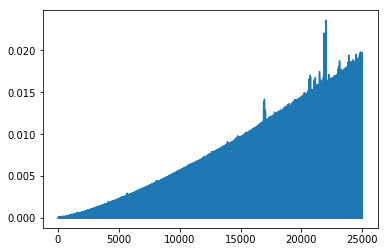

In [89]:
plt.plot(running_times)